In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from data_merge import *

import os 
import numpy as np

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


## Find the Data Folder of the Files

In [4]:
direc_ESAXS = './ESAXS/'
folders_ESAXS = sorted(os.listdir(direc_ESAXS))
folders_ESAXS

['04594_A2-T2_seeds_000_sub.dat',
 '04597_A5-T2_AuNP3_000_sub.dat',
 '04600_A6-T2_AuNP4_000_sub.dat',
 '04603_A7-T2_AuNP5_000_sub.dat',
 '04606_A8-T2_AuNP6_000_sub.dat',
 '04609_A9-T2_AuNP7_000_sub.dat',
 '04612_A10-T2_AuNP8_000_sub.dat',
 '04615_A11-T2_AuNP9_000_sub.dat',
 '04618_A12-T2_AuNP10_000_sub.dat',
 '04621_B1-T2_AuNP11_000_sub.dat',
 '04624_B2-T2_AuNP12_000_sub.dat',
 '04627_B3-T2_AuNP13_000_sub.dat',
 '04630_B4-T2_AuNP14_000_sub.dat',
 '04633_B5-T2_AuNP15_000_sub.dat',
 '04636_B6-T2_AuNP16_000_sub.dat',
 '04639_B7-T2_AuNP17_000_sub.dat',
 '04642_B8-T2_AuNP18_000_sub.dat',
 '04645_B9-T2_AuNP19_000_sub.dat',
 '04648_B10-T2_AuNP20_000_sub.dat']

In [5]:
direc_SAXS = './SAXS/'
folders_SAXS = sorted(os.listdir(direc_SAXS))
sorted(folders_SAXS)

['04595_A2-T2_seeds_000_sub.dat',
 '04598_A5-T2_AuNP3_000_sub.dat',
 '04601_A6-T2_AuNP4_000_sub.dat',
 '04604_A7-T2_AuNP5_000_sub.dat',
 '04607_A8-T2_AuNP6_000_sub.dat',
 '04610_A9-T2_AuNP7_000_sub.dat',
 '04613_A10-T2_AuNP8_000_sub.dat',
 '04616_A11-T2_AuNP9_000_sub.dat',
 '04619_A12-T2_AuNP10_000_sub.dat',
 '04622_B1-T2_AuNP11_000_sub.dat',
 '04625_B2-T2_AuNP12_000_sub.dat',
 '04628_B3-T2_AuNP13_000_sub.dat',
 '04631_B4-T2_AuNP14_000_sub.dat',
 '04634_B5-T2_AuNP15_000_sub.dat',
 '04637_B6-T2_AuNP16_000_sub.dat',
 '04640_B7-T2_AuNP17_000_sub.dat',
 '04643_B8-T2_AuNP18_000_sub.dat',
 '04646_B9-T2_AuNP19_000_sub.dat',
 '04649_B10-T2_AuNP20_000_sub.dat']

In [6]:
direc_MAXS = './MAXS/'
folders_MAXS = sorted(os.listdir(direc_MAXS))
folders_MAXS

['04596_A2-T2_seeds_000_sub.dat',
 '04599_A5-T2_AuNP3_000_sub.dat',
 '04602_A6-T2_AuNP4_000_sub.dat',
 '04605_A7-T2_AuNP5_000_sub.dat',
 '04608_A8-T2_AuNP6_000_sub.dat',
 '04611_A9-T2_AuNP7_000_sub.dat',
 '04614_A10-T2_AuNP8_000_sub.dat',
 '04617_A11-T2_AuNP9_000_sub.dat',
 '04620_A12-T2_AuNP10_000_sub.dat',
 '04623_B1-T2_AuNP11_000_sub.dat',
 '04626_B2-T2_AuNP12_000_sub.dat',
 '04629_B3-T2_AuNP13_000_sub.dat',
 '04632_B4-T2_AuNP14_000_sub.dat',
 '04635_B5-T2_AuNP15_000_sub.dat',
 '04638_B6-T2_AuNP16_000_sub.dat',
 '04641_B7-T2_AuNP17_000_sub.dat',
 '04644_B8-T2_AuNP18_000_sub.dat',
 '04647_B9-T2_AuNP19_000_sub.dat',
 '04650_B10-T2_AuNP20_000_sub.dat']

## Create Function to Read Files

In [7]:
def read_DAT_file(name):
    with open(name) as pdbfile:
        q = []
        I = []
        dI = []
        start = 10000
        for i,line in enumerate(pdbfile):
            if 'q(A-1)' in line:
                start = i
            if i > start: 
                splitted_line = [line[0:20], line[23:50], line[50:]]
                q.append(splitted_line[0])
                I.append(splitted_line[1])
                dI.append(splitted_line[2])
        q = np.array([float(i) for i in q])
        I = np.array([float(i) for i in I])
        dI = np.array([float(i) for i in dI])
        data = np.hstack((q.reshape(-1,1), I.reshape(-1,1), dI.reshape(-1,1)))
    return data

## Merge Data

Data files read are :  
 04594_A2-T2_seeds_000_sub.dat 
 04595_A2-T2_seeds_000_sub.dat 
 04596_A2-T2_seeds_000_sub.dat


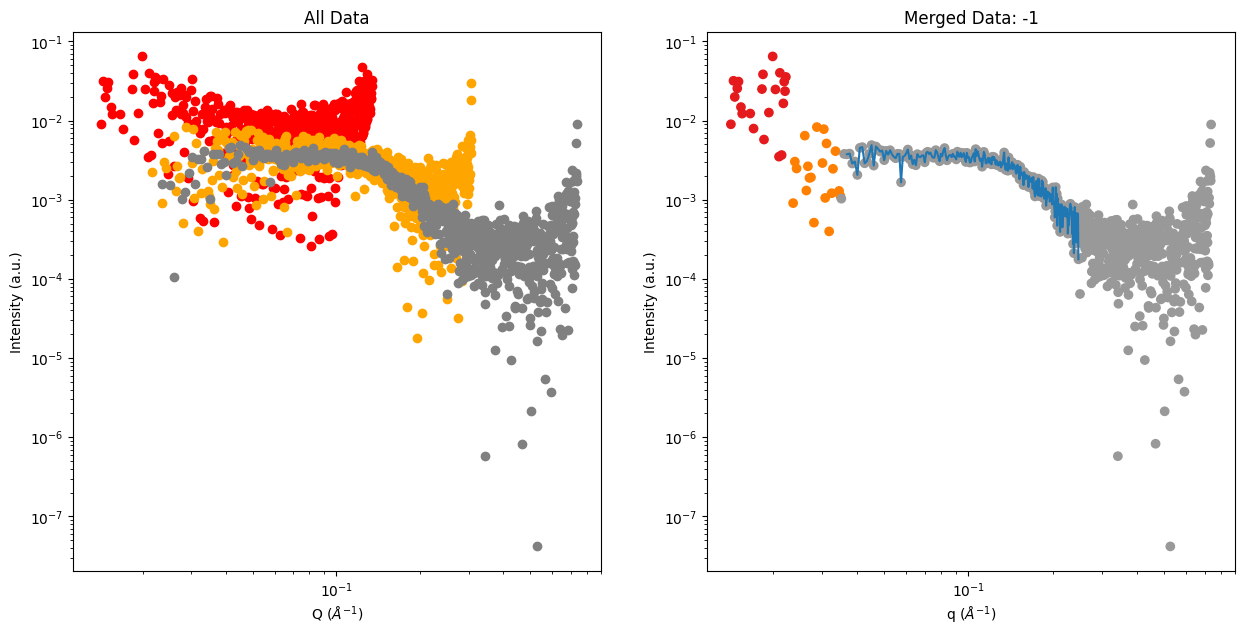

In [22]:
def custom_merger(i, cut_locations, limits):
    print("Data files read are : ", 
        "\n", folders_ESAXS[i], 
        "\n", folders_SAXS[i], 
        "\n", folders_MAXS[i]
        )
    ESAXS = read_DAT_file(direc_ESAXS + folders_ESAXS[i])
    SAXS = read_DAT_file(direc_SAXS + folders_SAXS[i])
    MAXS = read_DAT_file(direc_MAXS + folders_MAXS[i])

    idir = '../Merged_Data/221130_staticproteins' #Ignore This 
    data = perform_merge(Data_1 = ESAXS, 
                        Data_2 = SAXS, 
                        Data_3 = MAXS, 
                        cut_locations = cut_locations, 
                        idir = idir, 
                        save = False
                    )
    lower = limits[0]
    upper = -(data.shape[0] - limits[1])
    plt.loglog(data[lower:upper,0], data[lower:upper,1])
    plt.ylabel('Intensity (a.u.)')
    plt.xlabel('q ($\AA^{-1}$)')
    plt.title('Merged Data: ' + str(i-1))
    plt.show()

    return data[lower:upper,0],  data[lower:upper,1]

i = 0
q, Iq = custom_merger(i, [100, 22], [44, 300])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04597_A5-T2_AuNP3_000_sub.dat 
 04598_A5-T2_AuNP3_000_sub.dat 
 04599_A5-T2_AuNP3_000_sub.dat


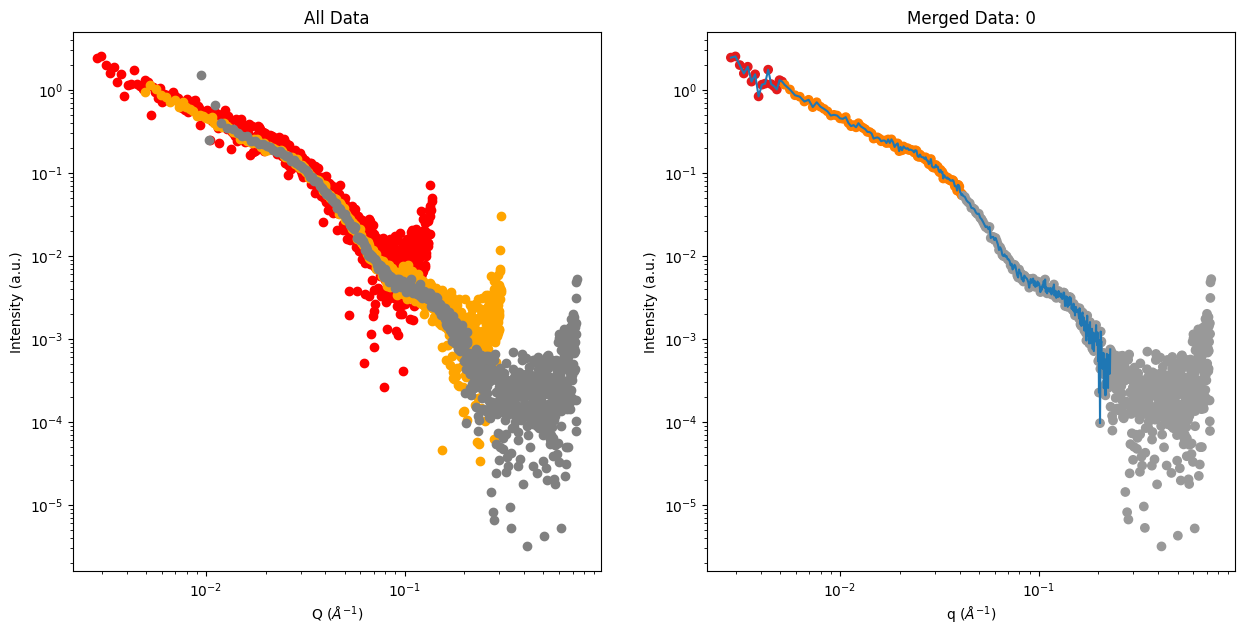

In [8]:
i = 1
q, Iq = custom_merger(i, [16, 400], [0, 350])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04600_A6-T2_AuNP4_000_sub.dat 
 04601_A6-T2_AuNP4_000_sub.dat 
 04602_A6-T2_AuNP4_000_sub.dat


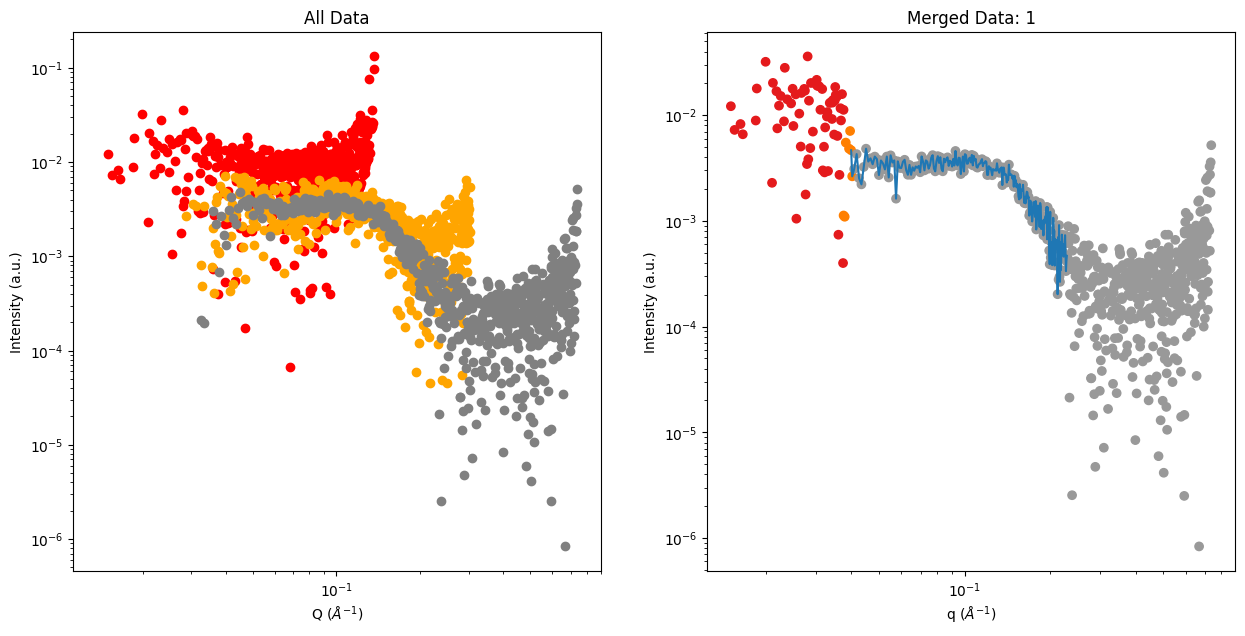

In [9]:
i = 2
q, Iq = custom_merger(i, [100, 80], [70, 300])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04603_A7-T2_AuNP5_000_sub.dat 
 04604_A7-T2_AuNP5_000_sub.dat 
 04605_A7-T2_AuNP5_000_sub.dat


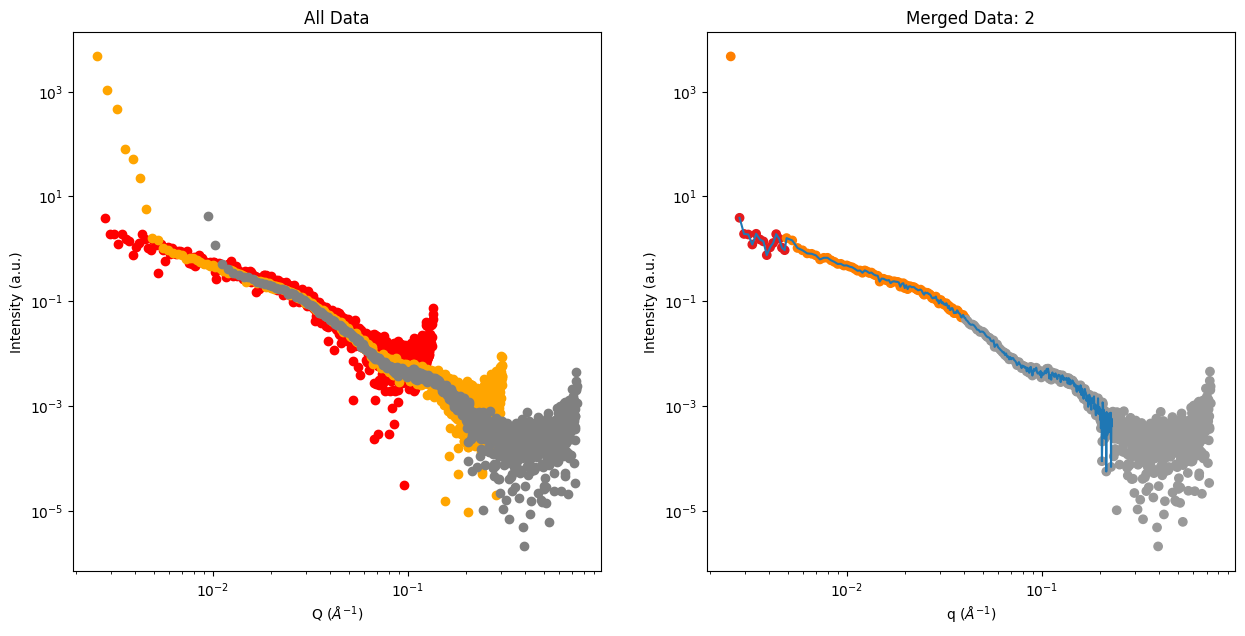

In [10]:
i = 3
q, Iq = custom_merger(i, [20, 400], [1, 350])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04606_A8-T2_AuNP6_000_sub.dat 
 04607_A8-T2_AuNP6_000_sub.dat 
 04608_A8-T2_AuNP6_000_sub.dat


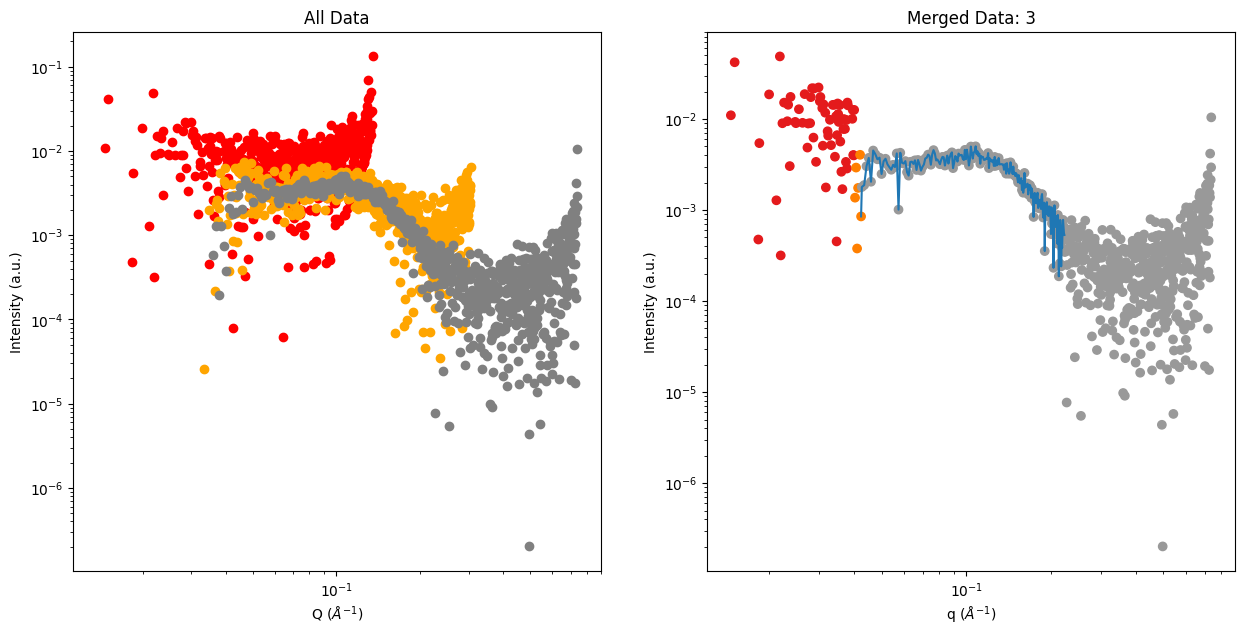

In [11]:
i = 4
q, Iq = custom_merger(i, [100, 80], [70, 290])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04609_A9-T2_AuNP7_000_sub.dat 
 04610_A9-T2_AuNP7_000_sub.dat 
 04611_A9-T2_AuNP7_000_sub.dat


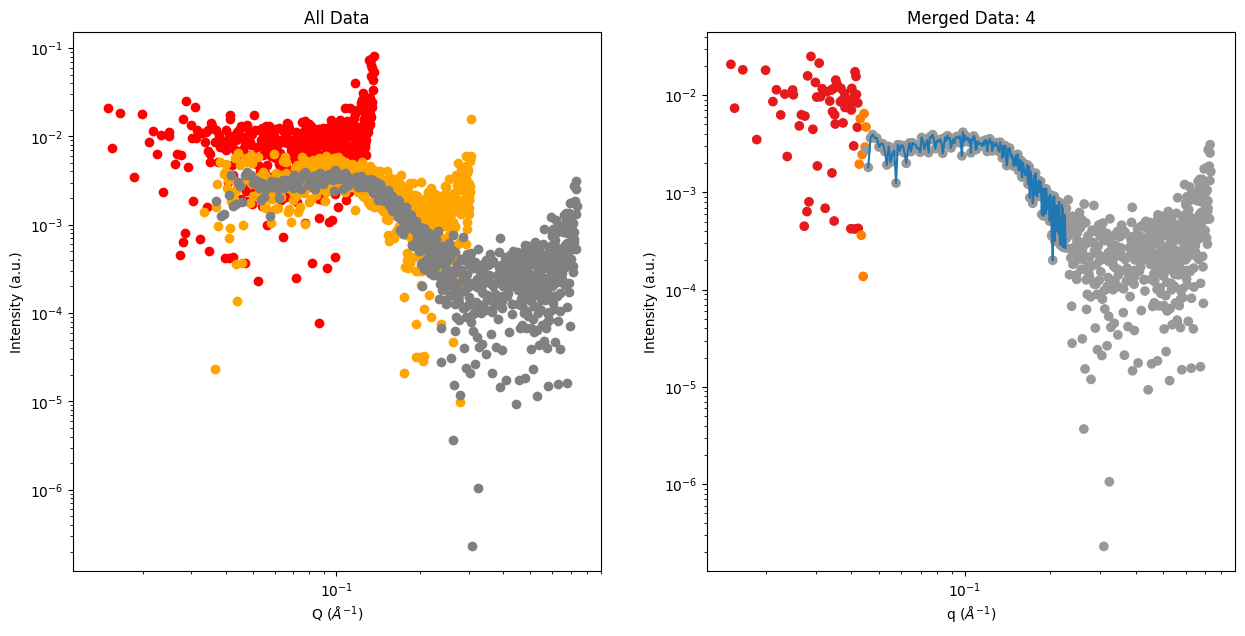

In [12]:
i = 5
q, Iq = custom_merger(i, [100, 80], [70, 290])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04612_A10-T2_AuNP8_000_sub.dat 
 04613_A10-T2_AuNP8_000_sub.dat 
 04614_A10-T2_AuNP8_000_sub.dat


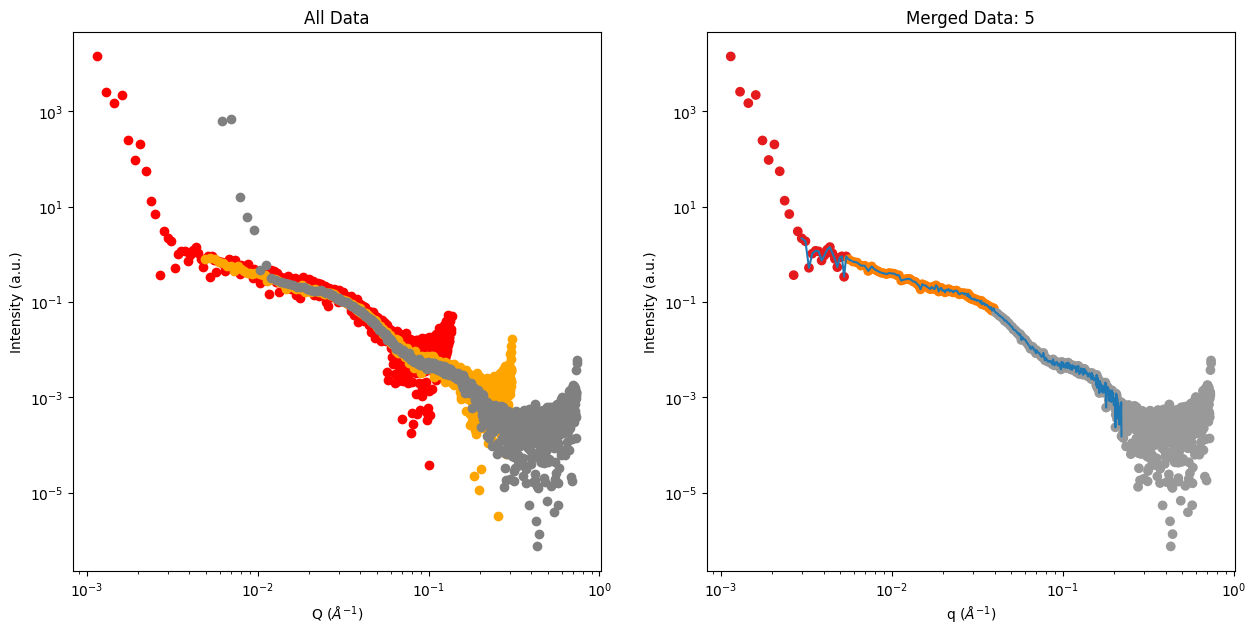

In [13]:
i = 6
q, Iq = custom_merger(i, [30, 400], [12, 350])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04615_A11-T2_AuNP9_000_sub.dat 
 04616_A11-T2_AuNP9_000_sub.dat 
 04617_A11-T2_AuNP9_000_sub.dat


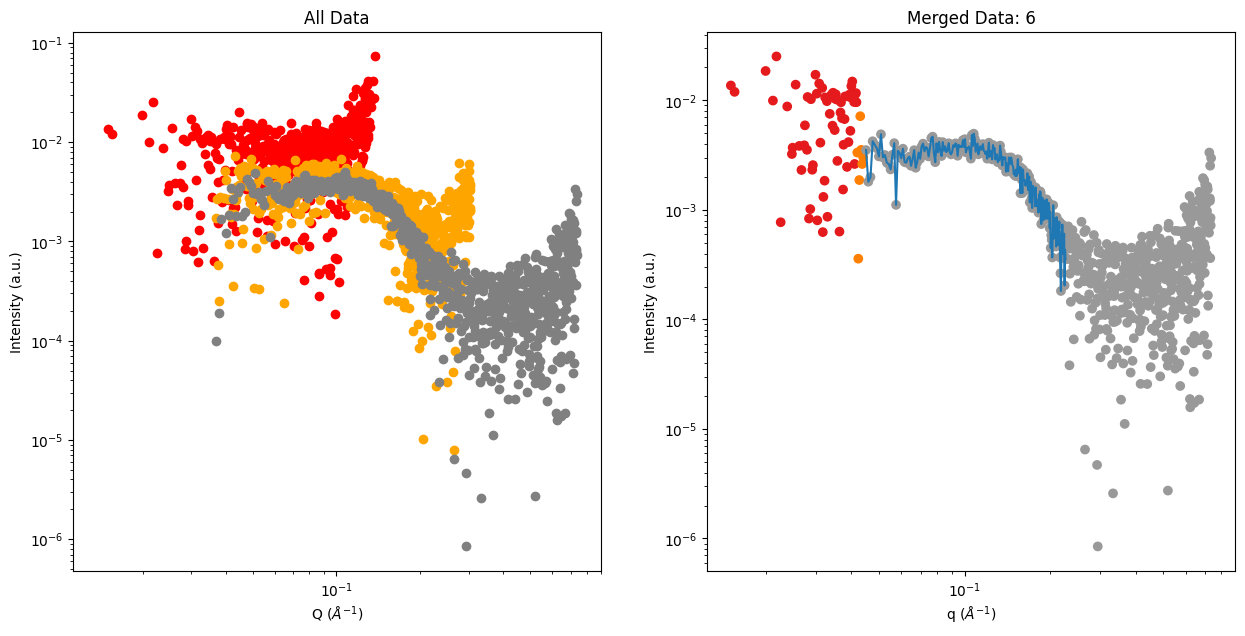

In [14]:
i = 7
q, Iq = custom_merger(i, [100, 80], [70, 290])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04618_A12-T2_AuNP10_000_sub.dat 
 04619_A12-T2_AuNP10_000_sub.dat 
 04620_A12-T2_AuNP10_000_sub.dat


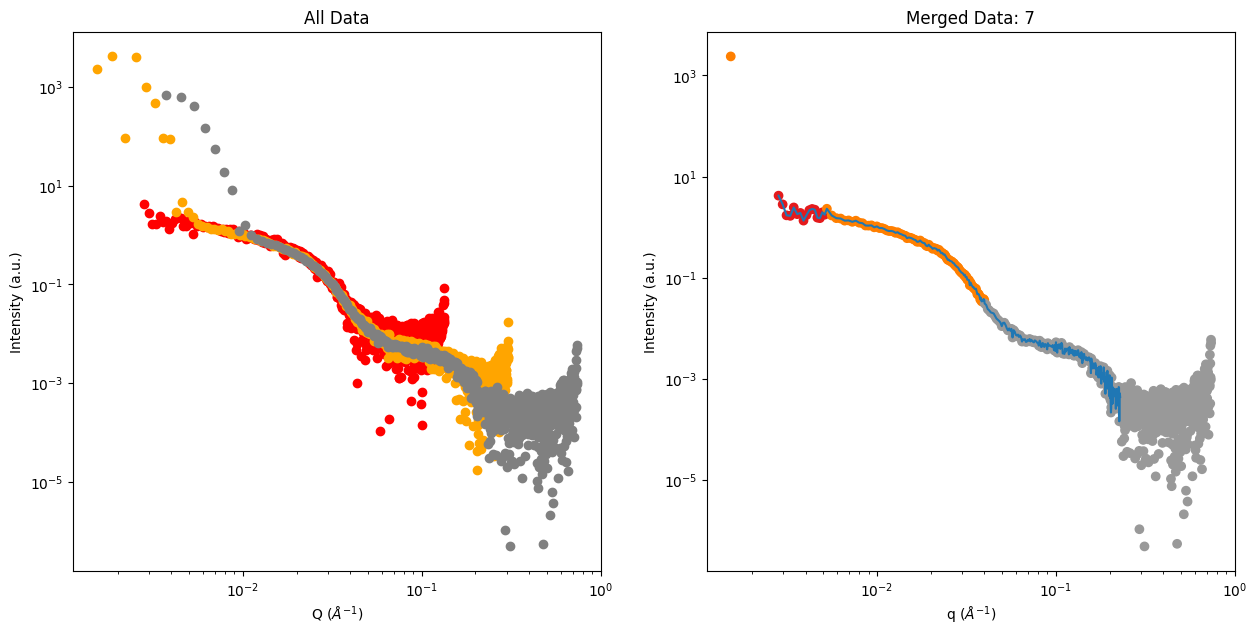

In [15]:
i = 8
q, Iq = custom_merger(i, [28, 400], [1, 350])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04621_B1-T2_AuNP11_000_sub.dat 
 04622_B1-T2_AuNP11_000_sub.dat 
 04623_B1-T2_AuNP11_000_sub.dat


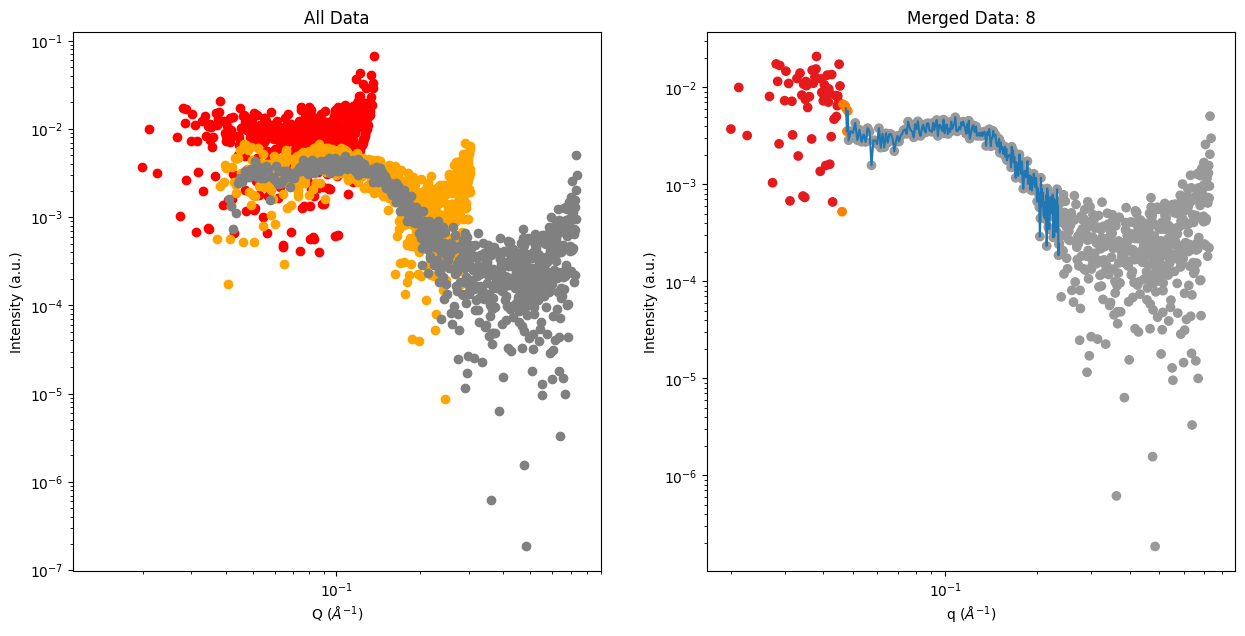

In [16]:
i = 9
q, Iq = custom_merger(i, [100, 80], [60, 290])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04624_B2-T2_AuNP12_000_sub.dat 
 04625_B2-T2_AuNP12_000_sub.dat 
 04626_B2-T2_AuNP12_000_sub.dat


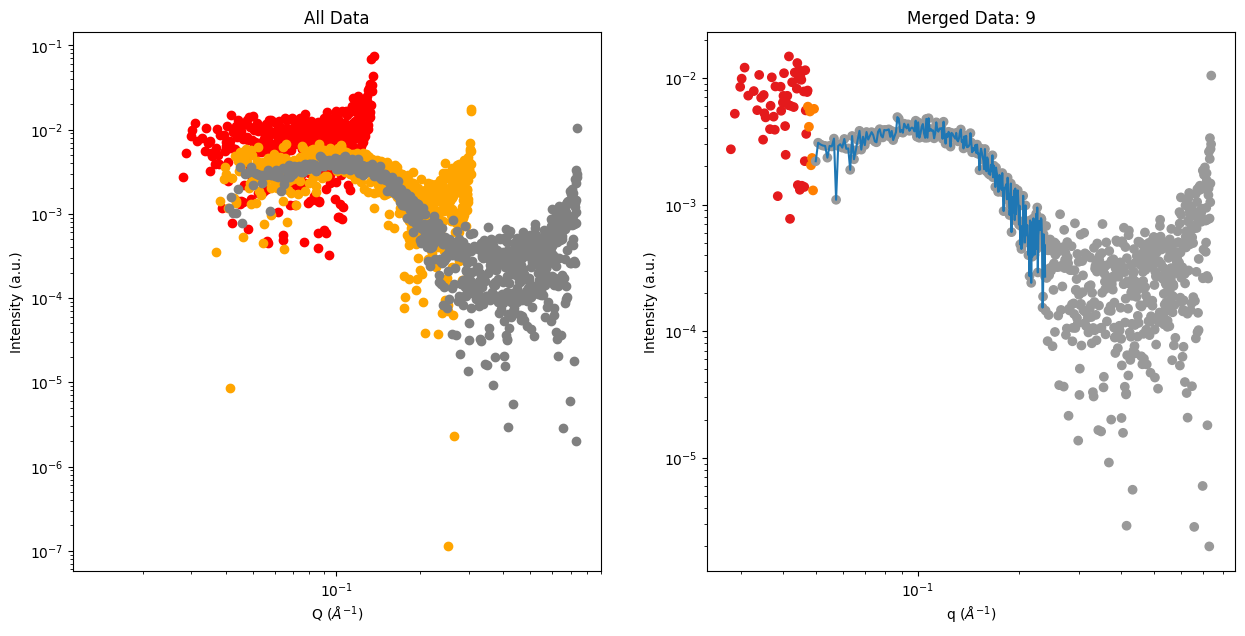

In [17]:
i = 10
q, Iq = custom_merger(i, [100, 80], [61, 290])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04627_B3-T2_AuNP13_000_sub.dat 
 04628_B3-T2_AuNP13_000_sub.dat 
 04629_B3-T2_AuNP13_000_sub.dat


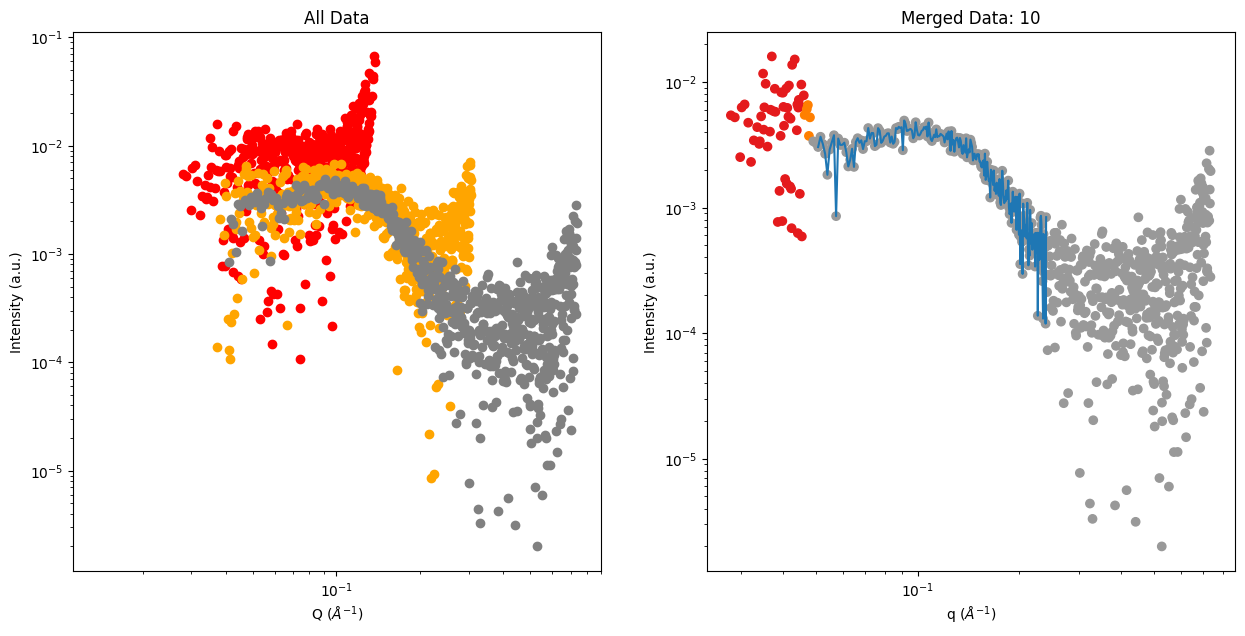

In [18]:
i = 11
q, Iq = custom_merger(i, [100, 80], [60, 290])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04630_B4-T2_AuNP14_000_sub.dat 
 04631_B4-T2_AuNP14_000_sub.dat 
 04632_B4-T2_AuNP14_000_sub.dat


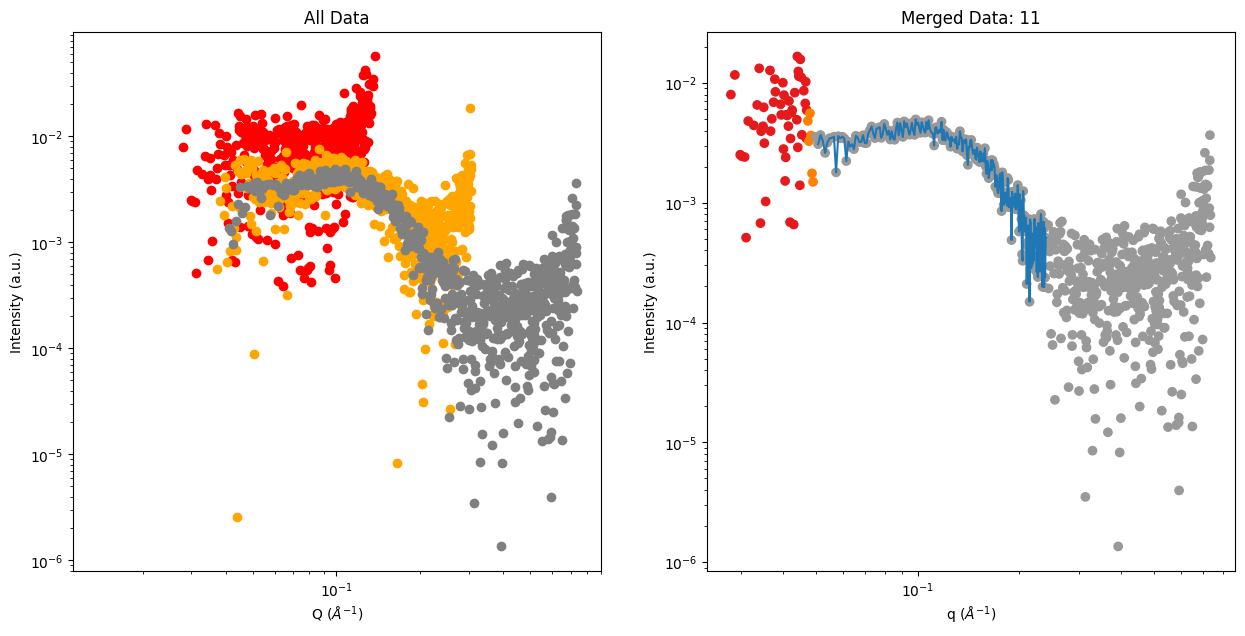

In [19]:
i = 12
q, Iq = custom_merger(i, [100, 80], [60, 290])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04633_B5-T2_AuNP15_000_sub.dat 
 04634_B5-T2_AuNP15_000_sub.dat 
 04635_B5-T2_AuNP15_000_sub.dat


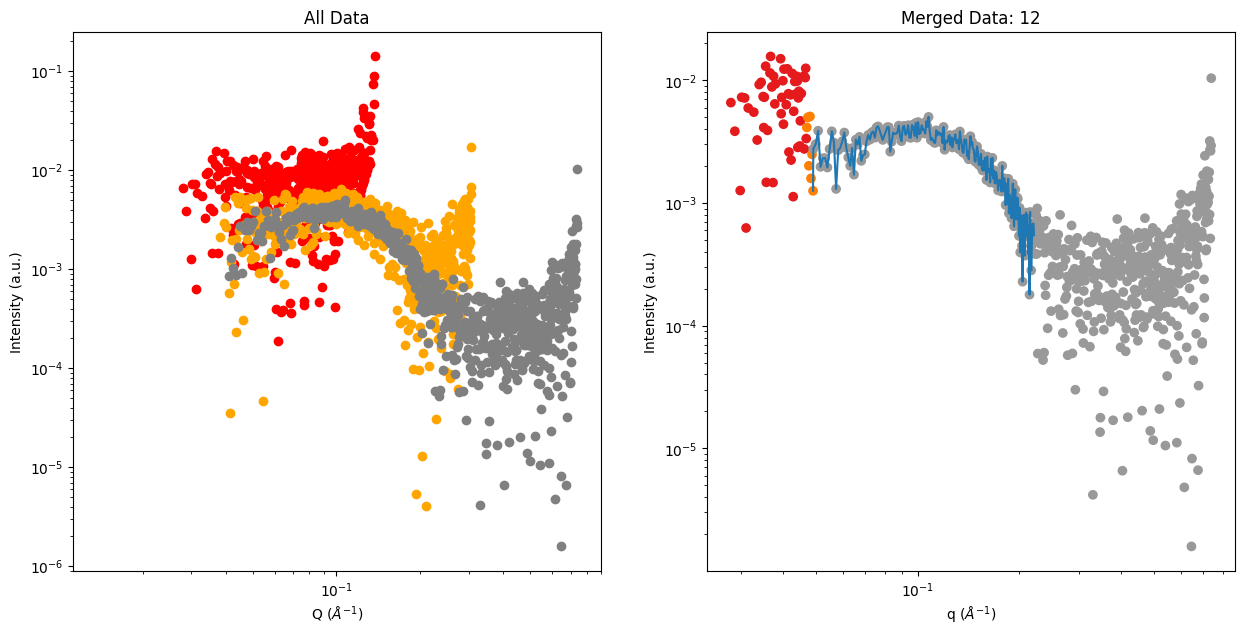

In [20]:
i = 13
q, Iq = custom_merger(i, [100, 80], [60, 270])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04636_B6-T2_AuNP16_000_sub.dat 
 04637_B6-T2_AuNP16_000_sub.dat 
 04638_B6-T2_AuNP16_000_sub.dat


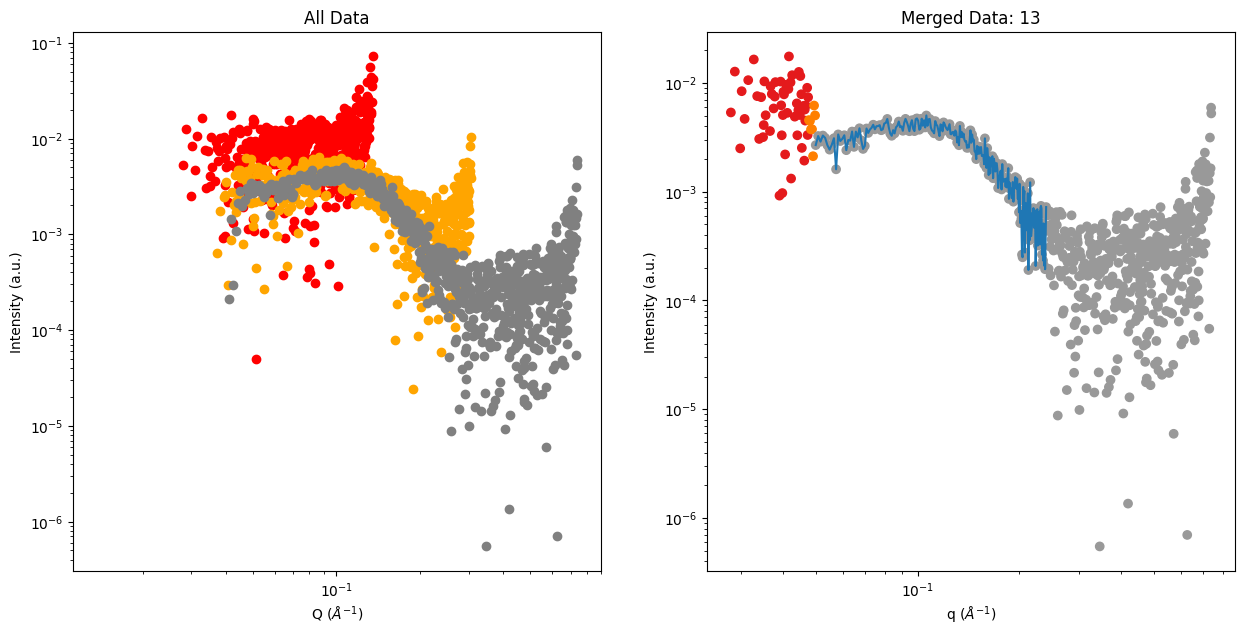

In [21]:
i = 14
q, Iq = custom_merger(i, [100, 80], [60, 290])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04639_B7-T2_AuNP17_000_sub.dat 
 04640_B7-T2_AuNP17_000_sub.dat 
 04641_B7-T2_AuNP17_000_sub.dat


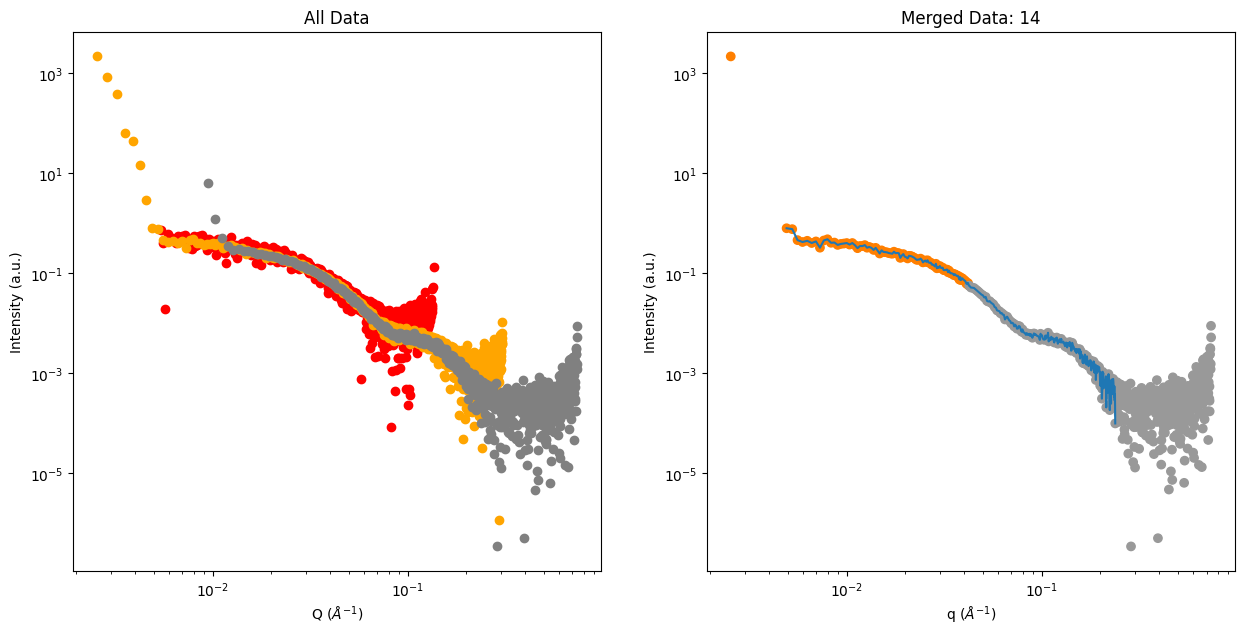

In [22]:
i = 15
q, Iq = custom_merger(i, [6, 400], [1, 350])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04642_B8-T2_AuNP18_000_sub.dat 
 04643_B8-T2_AuNP18_000_sub.dat 
 04644_B8-T2_AuNP18_000_sub.dat


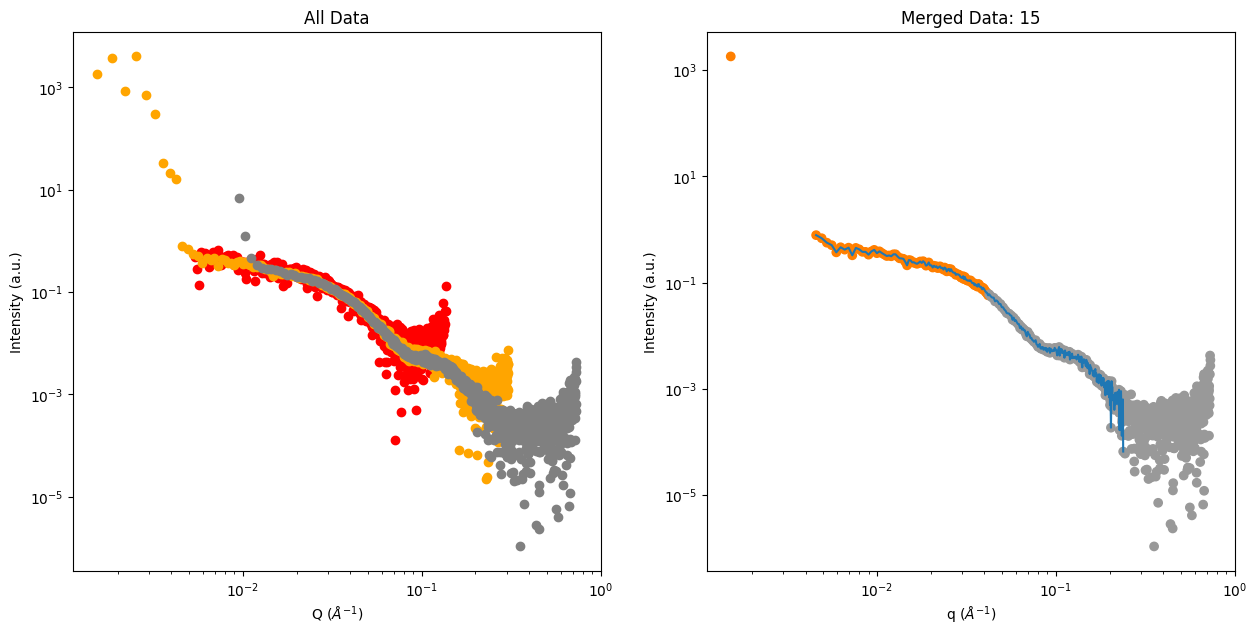

In [23]:
i = 16
q, Iq = custom_merger(i, [8, 400], [1, 350])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04645_B9-T2_AuNP19_000_sub.dat 
 04646_B9-T2_AuNP19_000_sub.dat 
 04647_B9-T2_AuNP19_000_sub.dat


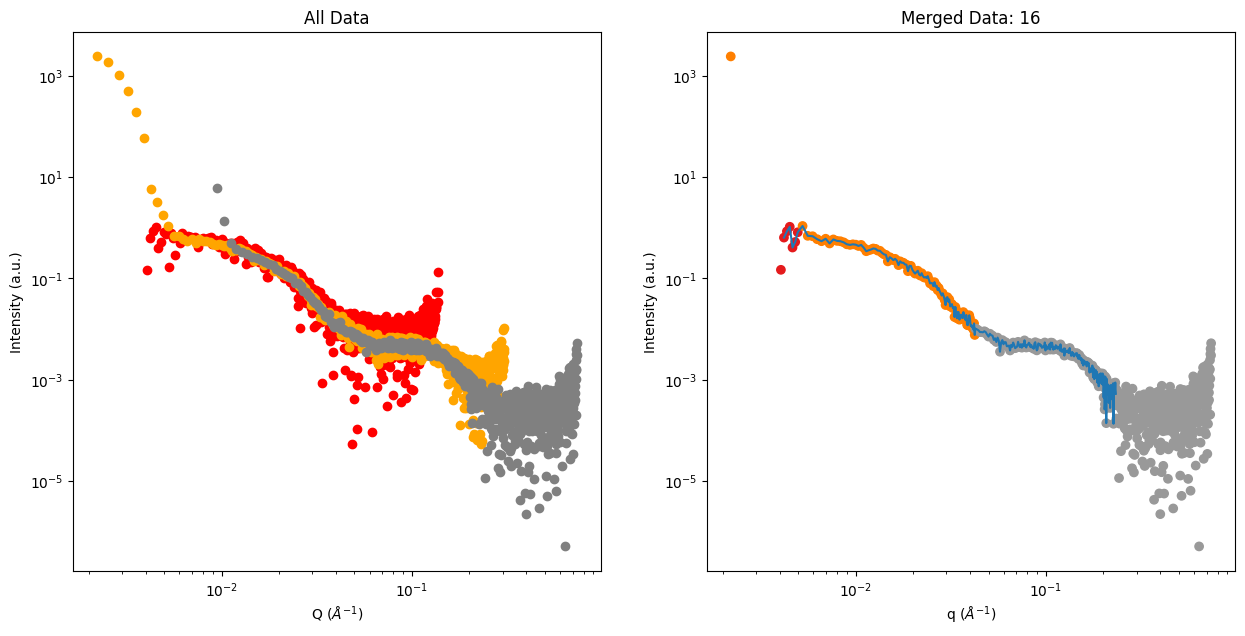

In [24]:
i = 17
q, Iq = custom_merger(i, [15, 400], [2, 350])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)

Data files read are :  
 04648_B10-T2_AuNP20_000_sub.dat 
 04649_B10-T2_AuNP20_000_sub.dat 
 04650_B10-T2_AuNP20_000_sub.dat


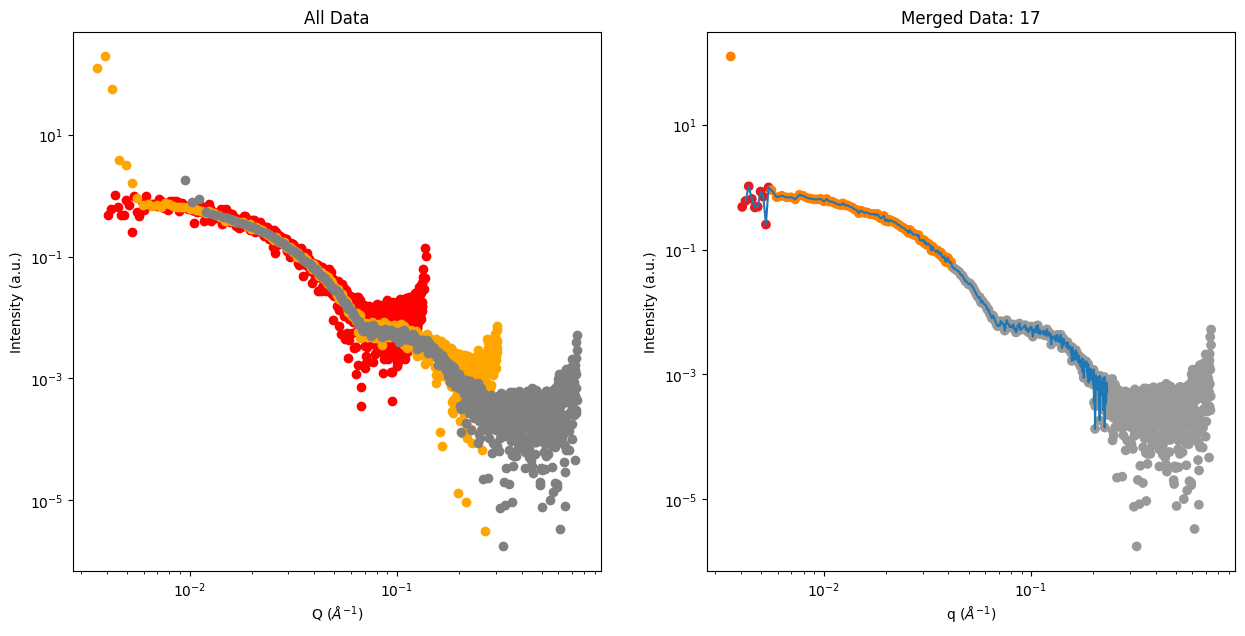

In [25]:
i = 18
q, Iq = custom_merger(i, [15, 400], [2, 350])
np.savez("./merged_data/%d.npz"%(i+1), q = q, Iq = Iq)